In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
from statsmodels.regression.rolling import RollingOLS

# Data
## Stocks close price

In [65]:
close_price = pd.read_excel("../data/stock_returns.xlsx")
close_price.head()

,Ticker,Monthly Calendar Date,Monthly Price,Monthly Price Date,Monthly Previous Price,Monthly Total Return
0,ACF,1961-01-31,50.250,1961-01-31,38.000,0.322368
1,ACF,1961-02-28,50.375,1961-02-28,50.250,0.014743
2,ACF,1961-03-30,54.750,1961-03-30,50.375,0.086849
3,ACF,1961-04-28,56.000,1961-04-28,54.750,0.022831
4,ACF,1961-05-31,59.750,1961-05-31,56.000,0.078315


## Risk free rate

### 3-month risk-free rate

In [3]:
# rf_all = pd.read_excel("../data/riskfree.xlsx")
# set(rf_all["TTERMLBL"])
# rf = rf_all[rf_all["TTERMLBL"] ==
#             'CRSP Risk Free Rates - 3-Month (Nominal)'].copy()
# rf = rf[["MCALDT", "TMBIDYTM"]]
# rf.index = list(range(rf.shape[0]))
# rf.head()

{'30-Day Commercial Paper CP30D',
 '60-Day Commercial Paper CP60D',
 '90-Day Commercial Paper CP90D',
 'CRSP Fixed Term Index - 1-Year (Nominal)',
 'CRSP Fixed Term Index - 10-Year (Nominal)',
 'CRSP Fixed Term Index - 2-Year (Nominal)',
 'CRSP Fixed Term Index - 20-Year (Nominal)',
 'CRSP Fixed Term Index - 30-Year (Nominal)',
 'CRSP Fixed Term Index - 5-Year (Nominal)',
 'CRSP Fixed Term Index - 7-Year (Nominal)',
 'CRSP Risk Free - 13 week (Nominal)',
 'CRSP Risk Free - 26 week (Nominal)',
 'CRSP Risk Free - 4 week (Nominal)',
 'CRSP Risk Free Rates - 1-Month (Nominal)',
 'CRSP Risk Free Rates - 3-Month (Nominal)',
 'Fama Bliss Discount Bonds - 1-Year (Nominal)',
 'Fama Bliss Discount Bonds - 2-Year (Nominal)',
 'Fama Bliss Discount Bonds - 3-Year (Nominal)',
 'Fama Bliss Discount Bonds - 4-Year (Nominal)',
 'Fama Bliss Discount Bonds - 5-Year (Nominal)',
 'Fama Maturity Portfolios - <= 12 Month',
 'Fama Maturity Portfolios - <= 6 Month',
 'Fama Maturity Portfolios - > 12 and <= 18 

### 10y Treasury rate

In [66]:
rf = pd.read_excel("../data/US 10 year yields.xlsx", sheet_name=1)
rf.head()

,DATES,GT10 Govt
0,1979-03-30,9.112
1,1979-04-30,9.352
2,1979-05-31,9.062
3,1979-06-29,8.812
4,1979-07-31,9.012


In [69]:
rf["rf"] = rf["GT10 Govt"]/100

## Russell index return

In [70]:
R3000 = pd.read_excel("../data/Russell 3000 Price.xlsx", sheet_name=0)
R3000.head()

,DATES,RAY Index
0,1979-03-30,58.464
1,1979-04-30,58.763
2,1979-05-31,57.473
3,1979-06-29,59.999
4,1979-07-31,60.761


In [71]:
R3000["return"] = R3000["RAY Index"].pct_change()
R3000.head()

,DATES,RAY Index,return
0,1979-03-30,58.464,NaN
1,1979-04-30,58.763,0.005114
2,1979-05-31,57.473,-0.021953
3,1979-06-29,59.999,0.043951
4,1979-07-31,60.761,0.012700


## S&P500

In [56]:
# SP500 = pd.read_excel("../data/sp500.xlsx", index_col=0)
# SP500.columns = ["mkt_ret_v", "mkt_ret"]
# SP500.head()

,Value-Weighted Return-incl. dividends,Equal-Weighted Return-incl. dividends
Calendar Date,,
1970-01-30,-0.075398,-0.058388
1970-02-27,0.059521,0.068592
1970-03-31,0.002806,0.003637
1970-04-30,-0.088831,-0.108800
1970-05-29,-0.054689,-0.082317


# calculate beta

In [72]:
close_price["q_pre_p"] = close_price["Monthly Price"].shift(3)
close_price["q_ret"] = close_price["Monthly Price"] / close_price["q_pre_p"] - 1

In [73]:
close_price = close_price[close_price["Monthly Price Date"]
                          >= datetime.strptime("1979-01-31", "%Y-%m-%d")]
close_price.index = close_price["Monthly Price Date"]
close_price.head()

,Ticker,Monthly Calendar Date,Monthly Price,Monthly Price Date,Monthly Previous Price,Monthly Total Return,q_pre_p,q_ret
Monthly Price Date,,,,,,,,
1979-01-31,ACF,1979-01-31,30.375,1979-01-31,30.750,-0.012195,32.000,-0.050781
1979-02-28,ACF,1979-02-28,29.500,1979-02-28,30.375,-0.011951,31.250,-0.056000
1979-03-30,ACF,1979-03-30,32.000,1979-03-30,29.500,0.084746,30.750,0.040650
1979-04-30,ACF,1979-04-30,34.500,1979-04-30,32.000,0.078125,30.375,0.135802
1979-05-31,ACF,1979-05-31,32.875,1979-05-31,34.500,-0.031407,29.500,0.114407


In [74]:
close_price["ann_ret_s"] = close_price["Monthly Total Return"] * 12
R3000["ann_ret"] = R3000["return"] * 12

## cal excess return
### russell index

In [75]:
# market excess return
mkt_all = R3000.merge(rf, left_on="DATES", right_on="DATES")
mkt_all["mkt_excess"] = mkt_all["ann_ret"] - mkt_all["rf"]
mkt = mkt_all[["DATES", "mkt_excess"]]
mkt.index = mkt.DATES
mkt

,DATES,mkt_excess
DATES,,
1979-03-30,1979-03-30,NaN
1979-04-30,1979-04-30,-0.032149
1979-05-31,1979-05-31,-0.354051
1979-06-29,1979-06-29,0.439293
1979-07-31,1979-07-31,0.062283
...,...,...
2022-07-29,2022-07-29,1.086842
2022-08-31,2022-08-31,-0.498656
2022-09-30,2022-09-30,-1.166522


### sp500

In [62]:
# SP500["ann_ret"] = SP500["mkt_ret"] * 12
# mkt_all1 = SP500.merge(rf, left_index=True, right_on="MCALDT")
# mkt_all1["mkt_excess"] = mkt_all1["ann_ret"] - mkt_all1["rf"]
# mkt1 = mkt_all1[["MCALDT", "mkt_excess"]]
# mkt1.index = mkt1.MCALDT
# mkt1

,MCALDT,mkt_excess
MCALDT,,
1970-01-30,1970-01-30,-0.781143
1970-02-27,1970-02-27,0.752725
1970-03-31,1970-03-31,-0.021464
1970-04-30,1970-04-30,-1.377014
1970-05-29,1970-05-29,-1.058684
...,...,...
2021-08-31,2021-08-31,0.279680
2021-09-30,2021-09-30,-0.451501
2021-10-29,2021-10-29,0.633201


### stock excess return

In [78]:
close_price

,Ticker,Monthly Calendar Date,Monthly Price,Monthly Price Date,Monthly Previous Price,Monthly Total Return,q_pre_p,q_ret,ann_ret_s
Monthly Price Date,,,,,,,,,
1979-01-31,ACF,1979-01-31,30.375,1979-01-31,30.750,-0.012195,32.000,-0.050781,-0.146341
1979-02-28,ACF,1979-02-28,29.500,1979-02-28,30.375,-0.011951,31.250,-0.056000,-0.143414
1979-03-30,ACF,1979-03-30,32.000,1979-03-30,29.500,0.084746,30.750,0.040650,1.016949
1979-04-30,ACF,1979-04-30,34.500,1979-04-30,32.000,0.078125,30.375,0.135802,0.937500
1979-05-31,ACF,1979-05-31,32.875,1979-05-31,34.500,-0.031407,29.500,0.114407,-0.376880
...,...,...,...,...,...,...,...,...,...
2021-11-30,TSLA,2021-11-30,1144.760,2021-11-30,1114.000,0.027612,735.720,0.555972,0.331346
2021-12-31,TSLA,2021-12-31,1056.780,2021-12-31,1144.760,-0.076855,775.480,0.362743,-0.922254
2022-01-31,TSLA,2022-01-31,936.720,2022-01-31,1056.780,-0.113609,1114.000,-0.159138,-1.363311


In [135]:
close_all = close_price.merge(rf, left_index=True, right_on="DATES")
close_all["excess_ret"] = close_all["ann_ret_s"] - close_all["rf"]
stk_excess_ret = close_all[["Ticker", "Monthly Price Date", "excess_ret"]]
stk_excess_ret.index = stk_excess_ret["Monthly Price Date"]
stk_excess_ret.head()

,Ticker,Monthly Price Date,excess_ret
Monthly Price Date,,,
1979-03-30,ACF,1979-03-30,0.925829
1979-03-30,AMT,1979-03-30,0.594594
1979-03-30,AYE,1979-03-30,0.322926
1979-03-30,ABC,1979-03-30,0.041233
1979-03-30,PA,1979-03-30,0.845050


# Calculate beta
## Use russell to cal beta

In [138]:
close_price_u = stk_excess_ret[[
    "Ticker", "excess_ret", "Monthly Price Date"]].copy()
close_price_u = close_price_u.drop_duplicates(
    subset=["Monthly Price Date", "Ticker"], keep="first")
cp_grouped = close_price_u.groupby("Ticker")

In [139]:
x = mkt["mkt_excess"]
# test
# group = close_price[close_price["Ticker"] == "ACF"]
ECoC = pd.DataFrame()
ls = []
for group in cp_grouped:
    name = group[0]
    y = group[1].copy()
    y = y[["excess_ret"]]
    xy = y.merge(x, left_index=True, right_index=True, how="inner")
    if xy.shape[0] > 60:
        rols = RollingOLS(xy.iloc[:, 0], xy.iloc[:, 1], window=60).fit()
        params = rols.params
        params.columns = ["beta"]
        params["name"] = name
        ls.append(params)
ECoC = pd.concat(ls)
ECoC

,beta,name
1979-03-30,NaN,A
1979-04-30,NaN,A
1979-05-31,NaN,A
1979-06-29,NaN,A
1979-07-31,NaN,A
...,...,...
2021-11-30,0.732720,ZTS
2021-12-31,0.740425,ZTS
2022-01-31,0.793790,ZTS
2022-02-28,0.790316,ZTS


In [140]:
ECoC = ECoC.dropna()

In [141]:
ECoC

,beta,name
1984-05-31,1.280621,A
1984-06-29,1.294309,A
1984-07-31,1.333736,A
1984-08-31,1.350989,A
1984-09-28,1.382558,A
...,...,...
2021-11-30,0.732720,ZTS
2021-12-31,0.740425,ZTS
2022-01-31,0.793790,ZTS
2022-02-28,0.790316,ZTS


In [142]:
grouped = ECoC.groupby("name")
date_ls = ECoC.index.drop_duplicates().sort_values()
beta_panel = pd.DataFrame(index=date_ls)
for name, group in grouped:
    group = group[["beta"]]
    group.columns = [name]
    beta_panel = beta_panel.merge(
        group, left_index=True, right_index=True, how="left")
    print(beta_panel.shape)

(448, 1)
(448, 2)
(448, 3)
(448, 4)
(448, 5)
(448, 6)
(448, 7)
(448, 8)
(448, 9)
(448, 10)
(448, 11)
(448, 12)
(448, 13)
(448, 14)
(448, 15)
(448, 16)
(448, 17)
(448, 18)
(448, 19)
(448, 20)
(448, 21)
(448, 22)
(448, 23)
(448, 24)
(448, 25)
(448, 26)
(448, 27)
(448, 28)
(448, 29)
(448, 30)
(448, 31)
(448, 32)
(448, 33)
(448, 34)
(448, 35)
(448, 36)
(448, 37)
(448, 38)
(448, 39)
(448, 40)
(448, 41)
(448, 42)
(448, 43)
(448, 44)
(448, 45)
(448, 46)
(448, 47)
(448, 48)
(448, 49)
(448, 50)
(448, 51)
(448, 52)
(448, 53)
(448, 54)
(448, 55)
(448, 56)
(448, 57)
(448, 58)
(448, 59)
(448, 60)
(448, 61)
(448, 62)
(448, 63)
(448, 64)
(448, 65)
(448, 66)
(448, 67)
(448, 68)
(448, 69)
(448, 70)
(448, 71)
(448, 72)
(448, 73)
(448, 74)
(448, 75)
(448, 76)
(448, 77)
(448, 78)
(448, 79)
(448, 80)
(448, 81)
(448, 82)
(448, 83)
(448, 84)
(448, 85)
(448, 86)
(448, 87)
(448, 88)
(448, 89)
(448, 90)
(448, 91)
(448, 92)
(448, 93)
(448, 94)
(448, 95)
(448, 96)
(448, 97)
(448, 98)
(448, 99)
(448, 100)
(448, 10

In [144]:
ECoC.to_excel("../clean_data/beta_1117_dropna.xlsx")
beta_panel.to_excel("../clean_data/beta_panel.xlsx")

In [145]:
ECoC = ECoC.merge(rf, left_index=True, right_on="DATES")
ECoC.head()

,beta,name,DATES,GT10 Govt,rf
62,1.280621,A,1984-05-31,13.80428,0.138043
62,1.185787,AAL,1984-05-31,13.80428,0.138043
62,0.527726,ABC,1984-05-31,13.80428,0.138043
62,0.988302,ACF,1984-05-31,13.80428,0.138043
62,1.486400,ACM,1984-05-31,13.80428,0.138043


In [146]:
ECoC["coe"] = ECoC["beta"] * 0.06 + ECoC["rf"]

In [147]:
ECoC.to_excel("../clean_data/ECoC_1117_dropna.xlsx")

In [148]:
grouped_ECoC = ECoC.groupby("name")
date_ls = ECoC["DATES"].drop_duplicates().sort_values()
name_ls = ECoC["name"].drop_duplicates().sort_values()
ECoC_panel = pd.DataFrame(date_ls, columns=['DATES'])
ecoc_ls = []
for name, group in grouped_ECoC:
    g = group[["DATES", "coe"]]
    g.columns = ["DATES", name]
    ECoC_panel = pd.merge(ECoC_panel, g, on="DATES", how="left")
    print(ECoC_panel.shape)

(448, 2)
(448, 3)
(448, 4)
(448, 5)
(448, 6)
(448, 7)
(448, 8)
(448, 9)
(448, 10)
(448, 11)
(448, 12)
(448, 13)
(448, 14)
(448, 15)
(448, 16)
(448, 17)
(448, 18)
(448, 19)
(448, 20)
(448, 21)
(448, 22)
(448, 23)
(448, 24)
(448, 25)
(448, 26)
(448, 27)
(448, 28)
(448, 29)
(448, 30)
(448, 31)
(448, 32)
(448, 33)
(448, 34)
(448, 35)
(448, 36)
(448, 37)
(448, 38)
(448, 39)
(448, 40)
(448, 41)
(448, 42)
(448, 43)
(448, 44)
(448, 45)
(448, 46)
(448, 47)
(448, 48)
(448, 49)
(448, 50)
(448, 51)
(448, 52)
(448, 53)
(448, 54)
(448, 55)
(448, 56)
(448, 57)
(448, 58)
(448, 59)
(448, 60)
(448, 61)
(448, 62)
(448, 63)
(448, 64)
(448, 65)
(448, 66)
(448, 67)
(448, 68)
(448, 69)
(448, 70)
(448, 71)
(448, 72)
(448, 73)
(448, 74)
(448, 75)
(448, 76)
(448, 77)
(448, 78)
(448, 79)
(448, 80)
(448, 81)
(448, 82)
(448, 83)
(448, 84)
(448, 85)
(448, 86)
(448, 87)
(448, 88)
(448, 89)
(448, 90)
(448, 91)
(448, 92)
(448, 93)
(448, 94)
(448, 95)
(448, 96)
(448, 97)
(448, 98)
(448, 99)
(448, 100)
(448, 101)
(448, 

In [ ]:
grouped_ECoC

In [149]:
ECoC_panel.to_excel("../clean_data/ecoc_panel.xlsx")

In [150]:
ECoC[["beta", "rf", "coe"]].describe()

,beta,rf,coe
count,407719.000000,407719.000000,407719.000000
mean,1.112945,0.045235,0.112012
std,0.663561,0.024936,0.043859
min,-3.515052,0.005290,-0.160606
25%,0.674502,0.024452,0.081100
50%,1.042269,0.042071,0.107157
75%,1.433601,0.060440,0.137895
max,6.536076,0.138388,0.428490


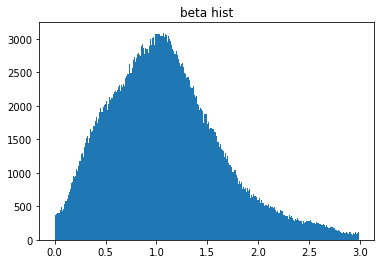

In [152]:
plt.hist(ECoC.beta, bins=np.arange(0, 3, 0.01))
plt.title("beta hist")
plt.savefig("../plot/beta hist.png")
plt.show()

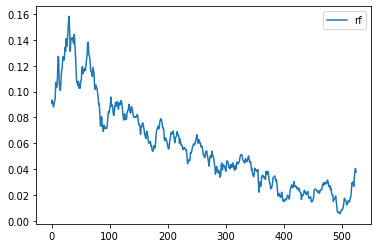

In [153]:
rf[["rf"]].plot()

In [154]:
grouped = ECoC.groupby("name")

ls = []
for group in grouped:
    name = group[0]
    group = group[1]
    if group.shape[0] > 120:
        group["10y_avg"] = group["coe"].rolling(120).mean()
        group["name"] = name
        ls.append(group.dropna())
ave_ecoc = pd.concat(ls)
ave_ecoc.to_excel("../clean_data/ave_ecoc_1117.xlsx")

In [158]:
grouped = ave_ecoc.groupby("name")
grouped.mean().to_excel("../clean_data/average_ecoc_on_each_stock.xlsx")

In [155]:
ave_ecoc[["coe", "10y_avg"]].describe()

,coe,10y_avg
count,243414.000000,243414.000000
mean,0.101392,0.107980
std,0.039628,0.032181
min,-0.160606,0.023947
25%,0.074495,0.084723
50%,0.096971,0.105180
75%,0.121598,0.128147
max,0.408378,0.306797


In [160]:
FCFROIC_ADJ = pd.read_excel("../clean_data/FCFROIC_ADJ_1117.xlsx", index_col=0)
FCFROIC_ADJ

,Global Company Key,Data Date,Fiscal Year,Fiscal Quarter,Ticker Symbol,FCFROIC,ROA,ROE,FCFROIC_ADJ,avg_fcfroic
0,1045,1963-06-30,1963,2.0,AAL,NaN,NaN,NaN,NaN,NaN
1,1045,1963-09-30,1963,3.0,AAL,NaN,NaN,NaN,NaN,NaN
2,1045,1963-12-31,1963,4.0,AAL,NaN,NaN,NaN,NaN,NaN
3,1045,1964-03-31,1964,1.0,AAL,NaN,NaN,NaN,NaN,NaN
4,1045,1964-06-30,1964,2.0,AAL,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
182593,328795,2021-06-30,2021,2.0,ACA,0.004033,0.001703,0.002558,0.004033,NaN
182594,328795,2021-09-30,2021,3.0,ACA,0.006054,0.000907,0.001502,0.006054,NaN
182595,328795,2021-12-31,2021,4.0,ACA,0.030491,-0.004469,-0.007447,0.030491,NaN
182596,328795,2022-03-31,2022,1.0,ACA,-0.000528,0.003414,0.005597,-0.000528,NaN


In [162]:
group2 = FCFROIC_ADJ.groupby("Ticker Symbol")
group2_mean = group2.mean()[["FCFROIC_ADJ", "avg_fcfroic"]]
group2_mean

,FCFROIC_ADJ,avg_fcfroic
Ticker Symbol,,
A,0.043515,0.052003
AA,0.001980,NaN
AAIC,0.023603,0.027205
AAL,-0.031475,-0.028008
AAP,0.102143,0.135487
...,...,...
ZLC,-0.021995,0.003775
ZM,0.243660,NaN
ZNGA,0.011733,0.010458


In [163]:
group1_mean = grouped.mean()

In [164]:
group1_mean

,beta,GT10 Govt,rf,coe,10y_avg
name,,,,,
A,1.557794,3.626688,0.036267,0.129735,0.142875
AAIC,1.194560,2.034371,0.020344,0.092017,0.130085
AAL,1.931271,3.964042,0.039640,0.155517,0.162972
AAP,0.919045,2.215904,0.022159,0.077302,0.080106
AAPL,1.289740,3.579738,0.035797,0.113182,0.123304
...,...,...,...,...,...
YUM,0.825177,2.031393,0.020314,0.069825,0.077515
ZBH,1.188297,1.924108,0.019241,0.090539,0.086229
ZBRA,1.309419,2.557191,0.025572,0.104137,0.100339


In [166]:
group1_mean.merge(group2_mean, left_index=True, right_index=True, how="outer").to_excel("../clean_data/merged_mean.xlsx")

## Use S&P 500 to cal beta

In [63]:
x = mkt1["mkt_excess"]
# test
# group = close_price[close_price["Ticker"] == "ACF"]
ECoC1 = pd.DataFrame()
ls = []
for group in cp_grouped:
    name = group[0]
    y = group[1].copy()
    y = y[["excess_ret"]]
    xy = y.merge(x, left_index=True, right_index=True, how="inner")
    if xy.shape[0] > 60:
        rols = RollingOLS(xy.iloc[:, 0], xy.iloc[:, 1], window=60).fit()
        params = rols.params
        params.columns = ["beta"]
        params["name"] = name
        ls.append(params)
ECoC1 = pd.concat(ls)
ECoC1

,beta,name
1979-01-31,NaN,A
1979-02-28,NaN,A
1979-03-30,NaN,A
1979-04-30,NaN,A
1979-05-31,NaN,A
...,...,...
2021-08-31,0.582004,ZTS
2021-09-30,0.588592,ZTS
2021-10-29,0.605288,ZTS
2021-11-30,0.590996,ZTS


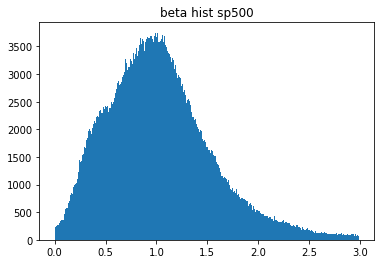

In [65]:
plt.hist(ECoC1.beta, bins=np.arange(0, 3, 0.01))
plt.title("beta hist sp500")
plt.savefig("../plot/beta hist sp500.png")
plt.show()

In [70]:
ECoC1 = ECoC1.merge(rf, left_index=True, right_on="MCALDT")
ECoC1["cost of equity"] = ECoC1["beta"] * 0.06 + ECoC1["rf"]
ECoC1[["beta", "cost of equity"]].describe()

,beta,cost of equity
count,442053.000000,442053.000000
mean,1.039568,0.092641
std,0.578564,0.041951
min,-2.438855,-0.128615
25%,0.655020,0.062556
50%,0.980632,0.089007
75%,1.326439,0.118886
max,6.192964,0.380288


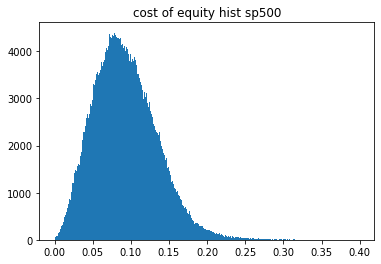

In [75]:
plt.hist(ECoC1["cost of equity"], bins=np.arange(0, 0.4, 0.001))
plt.title("cost of equity hist sp500")
plt.savefig("../plot/cost of equity hist sp500.png")
plt.show()

In [73]:
ECoC1.to_excel("../clean_data/ecoc1_1110.xlsx")

In [74]:
grouped = ECoC1.groupby("name")

ls = []
for group in grouped:
    name = group[0]
    group = group[1]
    if group.shape[0] > 120:
        group["10y_avg"] = group["coe"].rolling(120).mean()
        group["name"] = name
        ls.append(group.dropna())
ave_ecoc1 = pd.concat(ls)
ave_ecoc1.to_excel("../clean_data/ave_ecoc1_1110.xlsx")